Objective:

1. Analyzing most popular songs in 2023 released in the same year
2. How these most popular songs perform on different music platform
3. People's preferences of music that makes a song popular

Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

track_name: Name of the song

artist(s)_name: Name of the artist(s) of the song

artist_count: Number of artists contributing to the song

released_year: Year when the song was released

released_month: Month when the song was released

released_day: Day of the month when the song was released

in_spotify_playlists: Number of Spotify playlists the song is included in

in_spotify_charts: Presence and rank of the song on Spotify charts

streams: Total number of streams on Spotify

in_apple_playlists: Number of Apple Music playlists the song is included in

in_apple_charts: Presence and rank of the song on Apple Music charts

in_deezer_playlists: Number of Deezer playlists the song is included in

in_deezer_charts: Presence and rank of the song on Deezer charts

in_shazam_charts: Presence and rank of the song on Shazam charts

bpm: Beats per minute, a measure of song tempo

key: Key of the song

mode: Mode of the song (major or minor)

danceability_%: Percentage indicating how suitable the song is for dancing

valence_%: Positivity of the song's musical content

energy_%: Perceived energy level of the song

acousticness_%: Amount of acoustic sound in the song

instrumentalness_%: Amount of instrumental content in the song

liveness_%: Presence of live performance elements

speechiness_%: Amount of spoken words in the song

# Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/spotify-2023.csv', encoding='iso-8859-1')

In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data.shape

(953, 24)

# Data Understanding

In [ ]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


the latest record is on July 2023

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Data Cleaning

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

## Filling nulls

In [ ]:
data['key'] = data['key'].fillna('Unknown Key')

In [ ]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
data[data['in_shazam_charts']==0]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [ ]:
data['in_shazam_charts'] = data['in_shazam_charts'].fillna('0')

In [ ]:
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Change Data Types

In [ ]:
data['released_year'] = data['released_year'].astype('object')
data['released_month'] = data['released_month'].astype('object')
data['released_day'] = data['released_day'].astype('object')

In [ ]:
data['streams'] = data['streams'].astype('int64')

ValueError: ignored

the error is caused by an unexpected string, so we'll check the string

In [ ]:
data[data['streams']=='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


it is only one row so we're going to filter it out

In [ ]:
data= data[data['streams']!='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

In [ ]:
data['streams'] = data['streams'].astype('int64')

comma is considered as string so I'll replace it with no punctuation.

In [ ]:
data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',', '')

In [ ]:
data['in_shazam_charts'] = data['in_shazam_charts'].astype('int64')

In [ ]:
data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',', '')

In [ ]:
data['in_deezer_playlists'] = data['in_deezer_playlists'].astype('int64')

## Check Outlier

In [ ]:
numerical_col = data.select_dtypes(exclude='object')
numerical_col = numerical_col.loc[:, numerical_col.columns != 'streams']
numerical_col

,artist_count,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,553,147,43,263,45,10,826,125,80,89,83,31,0,8,4
1,1,1474,48,48,126,58,14,382,92,71,61,74,7,0,10,4
2,1,1397,113,94,207,91,14,949,138,51,32,53,17,0,31,6
3,1,7858,100,116,207,125,12,548,170,55,58,72,11,0,11,15
4,1,3133,50,84,133,87,15,425,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,953,0,61,13,37,1,0,144,60,24,39,57,0,8,3
949,1,1180,0,4,0,8,0,0,166,42,7,24,83,1,12,6
950,2,573,0,2,0,7,0,0,92,80,81,67,4,0,8,6
951,3,1320,0,29,26,17,0,0,97,82,67,77,8,0,12,5


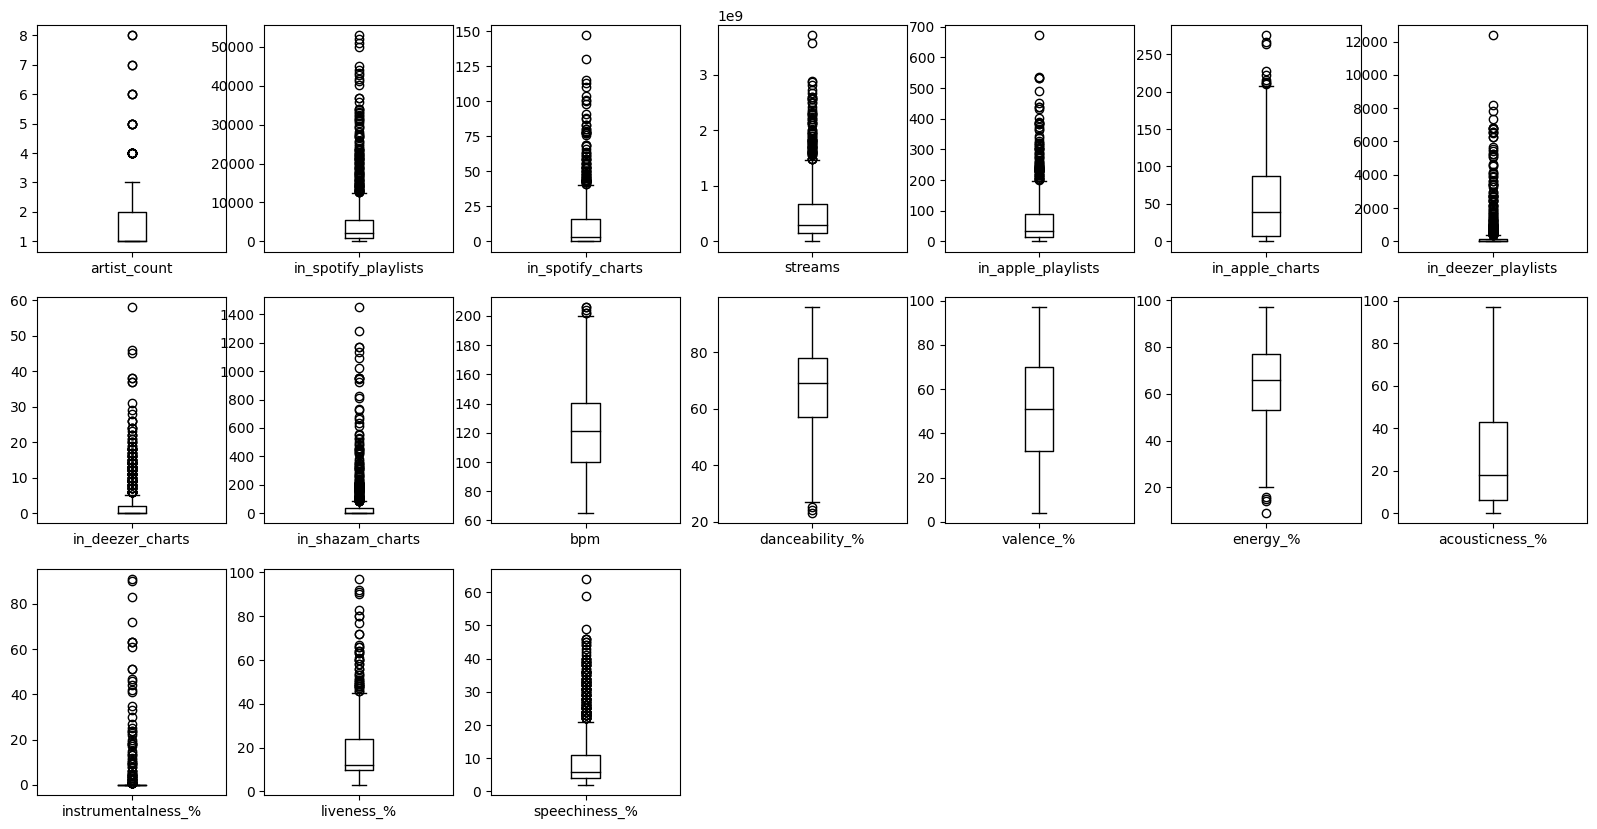

In [ ]:
data.plot(kind = 'box', subplots = True, layout = (3,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

The data has so many outliers. However, I'll leave it as it is because the context here is music charts. Music chart indicators, such as number of artist, stream, and chart position are whole numbers with no negative value. Also, for instance there are possibilities that a song placed in lower position, or sudden drop in danceability because that song is a slow song, etc.

# Data Analysis

## **Most Streamed Song in 2023 on Spotify**

In [ ]:
top_10_2023_song = data[['artist(s)_name','track_name','streams','in_spotify_charts','in_spotify_playlists','released_month','released_day']].sort_values(by='streams', ascending=False).head(10)
fig = px.bar(top_10_2023_song, x='streams', y='track_name')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

we can see that there are many songs that released before 2023 that people still listen to, such as Blinding Lights (2021), Shape of You (2017), STAY (2021).

## **Popular Song in 2023 released in 2023 on Spotify**

This time, I want to see songs that have been released in 2023 only.

In [ ]:
song_2023 = data[data['released_year']==2023]
top_10_2023_song = song_2023[['artist(s)_name','track_name','streams','in_spotify_charts','in_spotify_playlists','released_month','released_day']].sort_values(by='streams', ascending=False).head(10)
top_10_2023_song

,artist(s)_name,track_name,streams,in_spotify_charts,in_spotify_playlists,released_month,released_day
12,Miley Cyrus,Flowers,1316855716,115,12211,1,12
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,725980112,50,3090,3,16
133,"Shakira, Bizarrap","Shakira: Bzrp Music Sessions, Vol. 53",721975598,44,5724,1,11
34,"Karol G, Shakira",TQG,618990393,49,4284,2,23
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,553634067,44,2953,3,17
49,"Ariana Grande, The Weeknd",Die For You - Remix,518745108,47,3408,2,24
10,"Bad Bunny, Grupo Frontera",un x100to,505671438,40,2876,4,17
16,Fifty Fifty,Cupid - Twin Ver.,496795686,77,2942,2,24
160,"Natanael Cano, Peso Pluma",PRC,436027885,26,961,1,23
131,NewJeans,OMG,430977451,27,1783,1,2


note: stream number is from spotify only

Text(0.5, 1.0, '10 Most Streamed Song 2023 Released in the Same Year on Spotify')

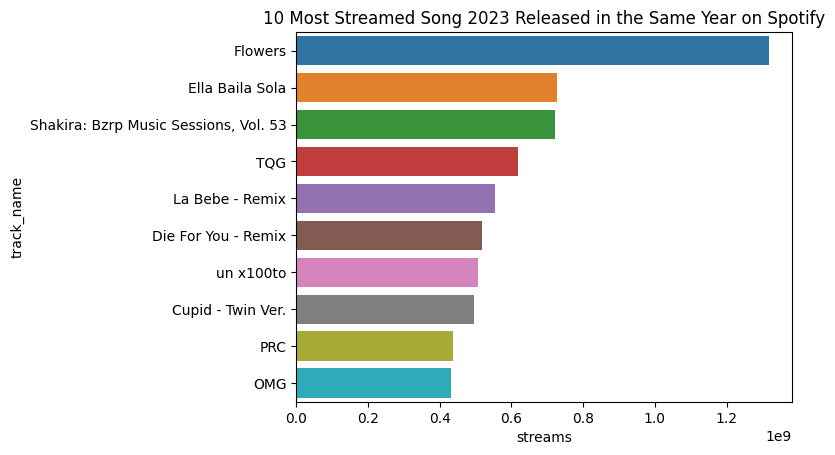

In [ ]:
sns.barplot(y='track_name', x='streams',data=top_10_2023_song)
plt.title('10 Most Streamed Song 2023 Released in the Same Year on Spotify')

## **How those popular songs perform on different platform?**

Now I want to see how those popular 2023 songs perform on different music platform. Note that streams here is streams from spotify only.

### 1) spotify chart

In [ ]:
top_10_song_2023_chart = song_2023[['artist(s)_name','track_name','streams','in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].sort_values(by='streams', ascending=False).head(10)
top_10_song_2023_chart

,artist(s)_name,track_name,streams,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
12,Miley Cyrus,Flowers,1316855716,115,215,58,1021
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,725980112,50,222,13,418
133,"Shakira, Bizarrap","Shakira: Bzrp Music Sessions, Vol. 53",721975598,44,108,29,22
34,"Karol G, Shakira",TQG,618990393,49,123,18,354
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,553634067,44,110,13,339
49,"Ariana Grande, The Weeknd",Die For You - Remix,518745108,47,86,1,16
10,"Bad Bunny, Grupo Frontera",un x100to,505671438,40,205,12,251
16,Fifty Fifty,Cupid - Twin Ver.,496795686,77,212,6,0
160,"Natanael Cano, Peso Pluma",PRC,436027885,26,143,6,15
131,NewJeans,OMG,430977451,27,124,1,22


In [ ]:
top_10_song_2023_chart = song_2023[['artist(s)_name','track_name','streams','in_spotify_charts', 'in_spotify_playlists','released_year','released_month','released_day']].sort_values(by='streams', ascending=False).head(10)
top_10_song_2023_chart

,artist(s)_name,track_name,streams,in_spotify_charts,in_spotify_playlists,released_year,released_month,released_day
12,Miley Cyrus,Flowers,1316855716,115,12211,2023,1,12
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,725980112,50,3090,2023,3,16
133,"Shakira, Bizarrap","Shakira: Bzrp Music Sessions, Vol. 53",721975598,44,5724,2023,1,11
34,"Karol G, Shakira",TQG,618990393,49,4284,2023,2,23
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,553634067,44,2953,2023,3,17
49,"Ariana Grande, The Weeknd",Die For You - Remix,518745108,47,3408,2023,2,24
10,"Bad Bunny, Grupo Frontera",un x100to,505671438,40,2876,2023,4,17
16,Fifty Fifty,Cupid - Twin Ver.,496795686,77,2942,2023,2,24
160,"Natanael Cano, Peso Pluma",PRC,436027885,26,961,2023,1,23
131,NewJeans,OMG,430977451,27,1783,2023,1,2


In [ ]:
song_2023[['streams','in_spotify_playlists','in_spotify_charts']].corr()

,streams,in_spotify_playlists,in_spotify_charts
streams,1.000000,0.789136,0.394937
in_spotify_playlists,0.789136,1.000000,0.497372
in_spotify_charts,0.394937,0.497372,1.000000


**Streams and chart have a correlation, but it's not very influential.**

See how Flowers by Miley Cyrus was the most streamed song in the list but the chart position is lower than NewJeans's OMG although both songs were released on the same week.

Consideration:

1) Streams and Chart Position:

* "Flowers" by Miley Cyrus has a high number of streams (1,316,855,716) but a lower position in the Spotify chart.
* **The correlation between "streams" and "in_spotify_charts" is 0.394937, indicating a positive correlation but a relatively weaker one**.
* Insight: While "Flowers" has a substantial number of streams, the correlation suggests that there may be other factors influencing its position on the chart. It's possible that the song faces competition from other songs with high streams, and chart position also depends on factors beyond just stream counts, such as the rate of streams over time and the engagement of listeners.

2) Playlists and Chart Position:
* "OMG" by NewJeans has a moderate number of streams (430,977,451) but is positioned higher in the Spotify chart.
"OMG" has a higher number of in_spotify_playlists (1,783) compared to "Flowers."
* **The correlation between "in_spotify_playlists" and "in_spotify_charts" is 0.497372, indicating a positive correlation.**
* Insight: The higher number of playlists featuring "OMG" suggests that it has gained significant playlist support. This can contribute to better chart performance as the correlation indicates. Being featured in popular and influential playlists can boost a song's visibility and performance on the chart, even if it doesn't have as many streams as some other songs.



<Axes: xlabel='streams', ylabel='in_spotify_charts'>

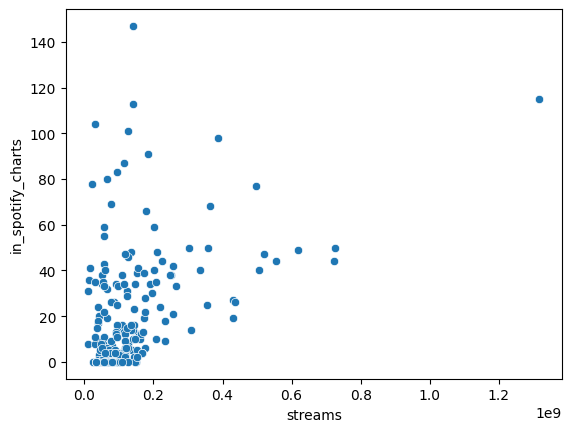

In [ ]:
sns.scatterplot(x='streams',y='in_spotify_charts',data=song_2023)

I confirmed it with a scatterplot to check the relationship between Spotify chart and Spotify streams. We see that some song got low streams but high in chart, while there are song that got >1.2B stream but positioned low in chart.

**Other Consideration:**

In music charting platforms, when a new song is released, older songs on the chart are likely to drop in position. Spotify updates its charts daily, weekly, and monthly. For example, if it's daily updates, the stream count for a song is based on the streams on that specific day. For older songs, the daily stream count is often lower compared to brand-new releases (though if you total the streams, older songs might have more in total). However, in cases where a song goes viral, it may not drop significantly on the charts.

Hence, there is a correlation, but it doesn't have a significant impact.

> There are songs with low streams but high chart positions. They might be newly released songs.

> There are songs with a high number of streams, millions even, but they have low chart positions. They might be songs that were released a long time ago.

Reminder: The latest data in this dataset is from July 2023.

### 2) Cross-platform comparison

In [ ]:
song_2023[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].corr()

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
in_spotify_charts,1.000000,0.714240,0.729599,0.717371
in_apple_charts,0.714240,1.000000,0.466448,0.600617
in_deezer_charts,0.729599,0.466448,1.000000,0.592225
in_shazam_charts,0.717371,0.600617,0.592225,1.000000


There is a high correlation in chart positions between other music platforms and Spotify, possibly because each other platform has charting indicators similar to Spotify.

Except for Apple and Deezer, the correlation is relatively low and not very impactful. So, it's possible that a song might have a high chart position on Apple but a lower one on Deezer, or vice versa. Regional factors and user preferences might also play a role. For example, in a particular region, Deezer might be more frequently used than Apple, and vice versa.

In [ ]:
song_2023[['streams','in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].corr()

,streams,in_apple_charts,in_deezer_charts,in_shazam_charts
streams,1.000000,0.419244,0.595333,0.281792
in_apple_charts,0.419244,1.000000,0.466448,0.600617
in_deezer_charts,0.595333,0.466448,1.000000,0.592225
in_shazam_charts,0.281792,0.600617,0.592225,1.000000


If I add Spotify streams to the analysis, some other interesting insights emerge:

1. Songs with a high number of streams on Spotify have a possibility of achieving high chart positions on Deezer as well. This helps explain the high correlation between Spotify and Deezer charts. This means that if a song is charting high on Spotify, it's likely to chart high on Deezer as well.

2. Songs with a high number of streams on Spotify can achieve high chart positions on Apple, though not always.

3. Shazam chart positions have a minimal impact on Spotify streams. This might be because Shazam is an app for identifying songs from audio, which is not always used by people. It's typically used by individuals who don't know a particular song.

### 3) People preferences that makes a song popular

In [ ]:
song_2023[['streams','in_spotify_playlists','bpm',	'danceability_%',	'valence_%',	'energy_%',	'acousticness_%',	'instrumentalness_%',	'liveness_%',	'speechiness_%']].corr()

,streams,in_spotify_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,1.000000,0.789136,0.105271,0.013107,0.124024,-0.032450,0.063172,-0.004437,-0.115910,0.019309
in_spotify_playlists,0.789136,1.000000,0.063677,-0.005963,0.019067,0.013084,-0.005689,0.052905,-0.110428,0.020489
bpm,0.105271,0.063677,1.000000,-0.054540,0.167757,0.190419,-0.105918,0.013476,-0.062840,-0.039589
danceability_%,0.013107,-0.005963,-0.054540,1.000000,0.330179,0.041837,-0.013716,0.027568,-0.206649,0.280894
valence_%,0.124024,0.019067,0.167757,0.330179,1.000000,0.330955,-0.022178,-0.126410,-0.004677,0.087122
energy_%,-0.032450,0.013084,0.190419,0.041837,0.330955,1.000000,-0.439345,0.031835,0.090970,-0.173373
acousticness_%,0.063172,-0.005689,-0.105918,-0.013716,-0.022178,-0.439345,1.000000,-0.030537,-0.080917,0.089349
instrumentalness_%,-0.004437,0.052905,0.013476,0.027568,-0.126410,0.031835,-0.030537,1.000000,-0.009333,-0.053613
liveness_%,-0.115910,-0.110428,-0.062840,-0.206649,-0.004677,0.090970,-0.080917,-0.009333,1.000000,-0.084212
speechiness_%,0.019309,0.020489,-0.039589,0.280894,0.087122,-0.173373,0.089349,-0.053613,-0.084212,1.000000


Valence: emotion produced by the song.

A high valence value indicates positive emotions, such as happiness, excitement, or cheerfulness, while a low valence value suggests negative emotions, like sadness, melancholy, or anger

1. Songs that are included in many playlists tend to have a high number of streams (high correlation of 0.78).

2. Songs with a high "valence%" (resulting in positive energy and emotions, possibly high-energy or upbeat songs) and a high BPM (beats per minute) are more likely to receive a high number of streams.

3. Songs with a significant amount of speech-like elements (possibly rap) and that evoke positive emotions (high valence) are typically more danceable.

## Distribution

In [ ]:
numerical_col = data.select_dtypes(exclude='object')
numerical_col = numerical_col.loc[:, numerical_col.columns != 'streams']
numerical_col

,artist_count,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,553,147,43,263,45,10,826,125,80,89,83,31,0,8,4
1,1,1474,48,48,126,58,14,382,92,71,61,74,7,0,10,4
2,1,1397,113,94,207,91,14,949,138,51,32,53,17,0,31,6
3,1,7858,100,116,207,125,12,548,170,55,58,72,11,0,11,15
4,1,3133,50,84,133,87,15,425,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,953,0,61,13,37,1,0,144,60,24,39,57,0,8,3
949,1,1180,0,4,0,8,0,0,166,42,7,24,83,1,12,6
950,2,573,0,2,0,7,0,0,92,80,81,67,4,0,8,6
951,3,1320,0,29,26,17,0,0,97,82,67,77,8,0,12,5


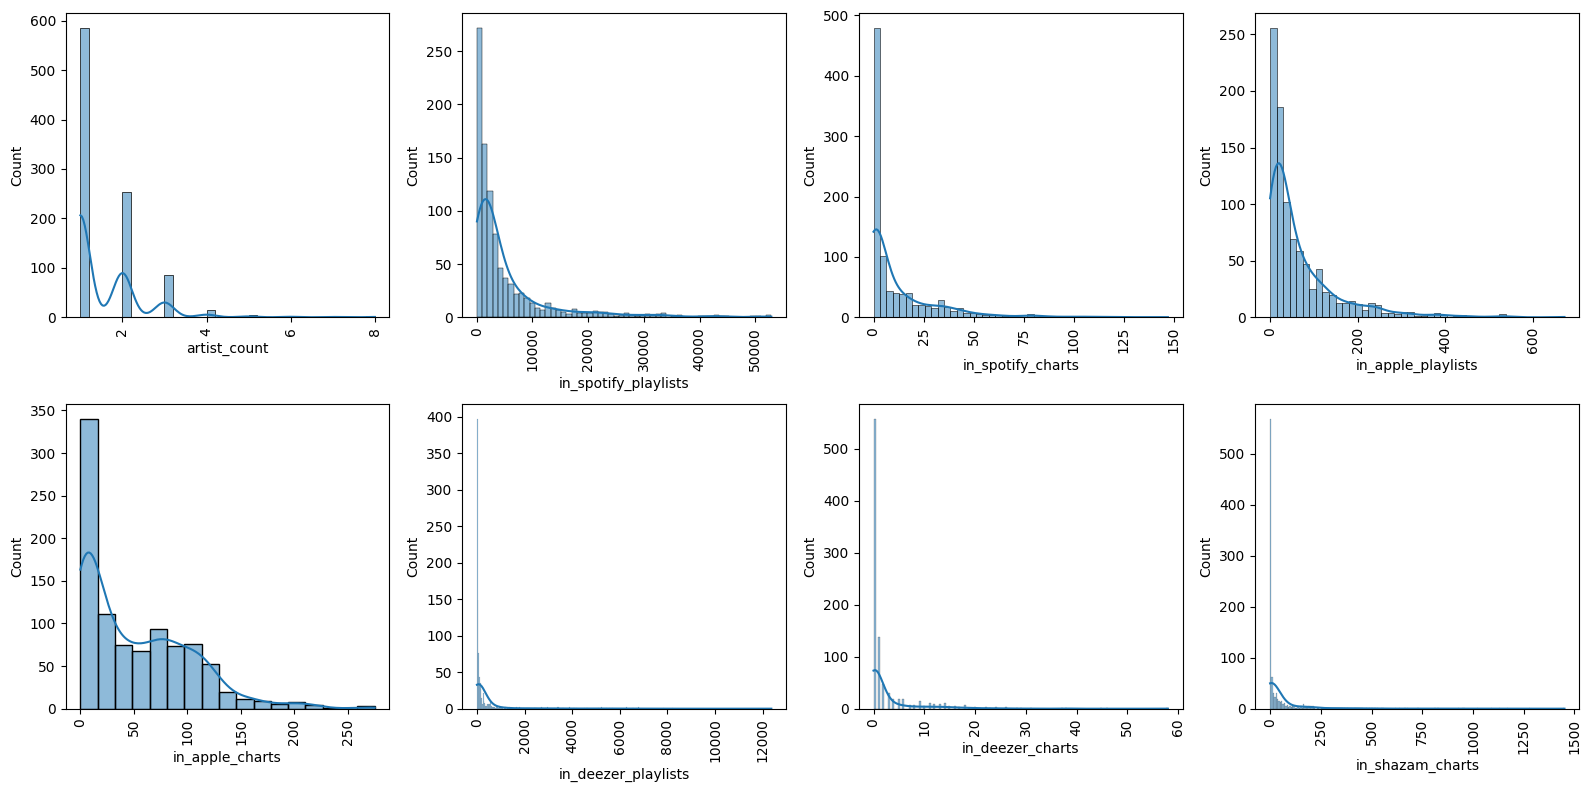

In [ ]:
plt.figure(figsize=(16, 8))

# Define the number of rows and columns
num_rows = 2
num_cols = 4

for index, column in enumerate(numerical_col):
    if index < num_rows * num_cols:
        plt.subplot(num_rows, num_cols, index + 1)
        sns.histplot(data=numerical_col, x=column, kde=True)
        plt.xticks(rotation=90)

plt.tight_layout(pad=1.0)
plt.show()

all positively skewed

# Machine Learning

## Unsupervised Model Training with Clustering

In [ ]:
from sklearn.cluster import KMeans

### Song Popularity based on preference
['streams','bpm',	'danceability_%',	'valence_%',	'energy_%',	'acousticness_%',	'instrumentalness_%',	'liveness_%',	'speechiness_%']

In [ ]:
features = ['streams','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

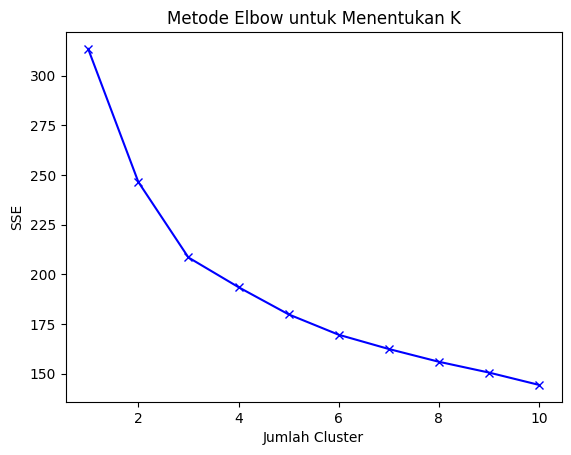

In [ ]:
km = KMeans(n_clusters=3)
km
# Elbow Method
sse = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data['cluster'] = labels
data.shape

(952, 25)

In [ ]:
data.groupby('cluster')[features].mean()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
cluster,,,,,,,,,
0,4.791636e+08,122.236715,75.251208,72.041063,71.661836,20.888889,0.543478,18.342995,10.830918
1,5.068307e+08,125.071023,63.176136,33.974432,66.443182,12.400568,2.357955,18.957386,10.352273
2,6.058101e+08,118.494624,55.790323,38.467742,43.725806,68.634409,2.430108,16.521505,8.193548


Group 0 = Low streams

Group 1 = Moderate streams

Group 2 = High streams

In [ ]:
def clustering(data, col1, col2):
    # Define the unique cluster labels
    unique_clusters = data['cluster'].unique()
    # Define colors for each cluster
    colors = ['green', 'yellow', 'red']  # Add more colors as needed
    # Create a scatter plot for each cluster
    plt.figure(figsize=(8, 6))
    for i, cluster_label in enumerate(unique_clusters):
        cluster_df = data[data['cluster'] == cluster_label]
        plt.scatter(cluster_df[col1], cluster_df[col2], color=colors[i], label=f'Cluster {cluster_label}')

    # Add labels and legend
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()

    # Set the plot title using an f-string
    plt.title(f'How {col1} and {col2} Affect Songs Popularity')

    # Show the plot after all clusters have been plotted
    plt.show()


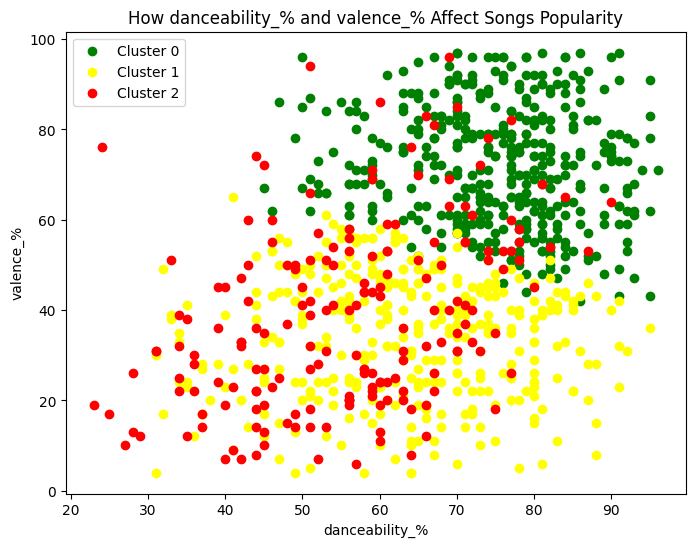

In [ ]:
clustering(data, 'danceability_%','valence_%')

Insights:

1. In Cluster Group 0, songs tend to be more danceable and convey positive emotions.

2. Cluster Group 1, which receives a moderate number of streams, has a range of danceable songs but tends to be less emotionally positive.

3. In Cluster Group 2, which features the most popular songs, there is more diversity, but the majority of songs have lower danceability and valence, indicating a preference for slower, more emotional tracks among listeners.

1) Cluster group 0: High danceability & valence

In [ ]:
select_cols = ['artist(s)_name','track_name','streams', 'cluster']
clustergroup = data[select_cols].sort_values(by='streams',ascending=False).head(20)
clustergroup[clustergroup['cluster']==0]

,artist(s)_name,track_name,streams,cluster
179,Ed Sheeran,Shape of You,3562543890,0
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550,0
140,Imagine Dragons,Believer,2594040133,0
725,"The Chainsmokers, Halsey",Closer,2591224264,0
14,Harry Styles,As It Was,2513188493,0
693,"Shawn Mendes, Camila Cabello",Seï¿½ï¿½o,2484812918,0
407,Dua Lipa,Don't Start Now,2303033973,0


2) Cluster group 1

In [ ]:
clustergroup[clustergroup['cluster']==1]

,artist(s)_name,track_name,streams,cluster
55,The Weeknd,Blinding Lights,3703895074,1
162,"Drake, WizKid, Kyla",One Dance,2713922350,1
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665343922,1
48,"The Weeknd, Daft Punk",Starboy,2565529693,1
138,Ed Sheeran,Perfect,2559529074,1
127,Harry Styles,Watermelon Sugar,2322580122,1
73,The Neighbourhood,Sweater Weather,2282771485,1


3) Cluster Group 2

In [ ]:
clustergroup[clustergroup['cluster']==2]

,artist(s)_name,track_name,streams,cluster
86,Lewis Capaldi,Someone You Loved,2887241814,2
620,Tones and I,Dance Monkey,2864791672,2
71,Glass Animals,Heat Waves,2557975762,2
324,James Arthur,Say You Won't Let Go,2420461338,2
128,"Billie Eilish, Khalid",lovely - Bonus Track,2355719893,2
621,Juice WRLD,Lucid Dreams,2288695111,2


In [ ]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cluster'],
      dtype='object')

### Song Popularity based on Chart Performance on Different Platform
['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts' 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

In [ ]:
features = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

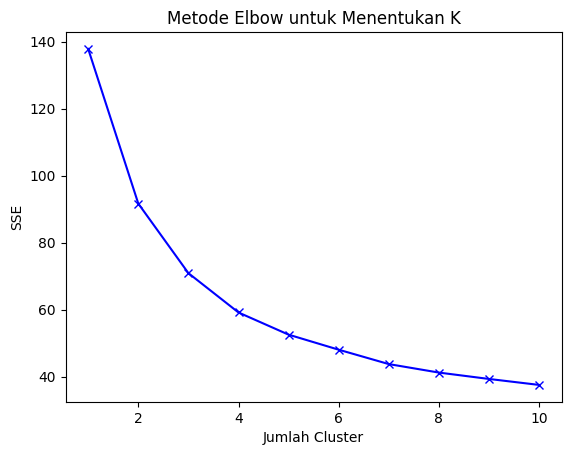

In [ ]:
km = KMeans(n_clusters=3)
km
# Elbow Method
sse = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data['cluster'] = labels
data.shape

(952, 25)

In [ ]:
data.groupby('cluster')[features].mean()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
cluster,,,,,,,,
0,16057.578125,28.859375,1.327655e+09,185.927083,104.802083,1605.072917,7.375000,153.046875
1,2460.246053,7.768421,3.086173e+08,38.040789,38.614474,77.442105,1.480263,32.619737


Insights:

1. Cluster 0, seems to represent songs that are less popular or have lower visibility on these platforms. They have lower stream counts, fewer chart positions, and weaker presence in playlists and charts.

2. Cluster 1 on the other hand, appears to represent songs that are more popular or have higher visibility in various music platforms. They have significantly more streams, higher chart positions, and stronger presence in playlists and charts across Spotify, Apple Music, Deezer, and Shazam.


This clustering could help identify distinct groups of songs based on their performance and presence on different music platforms, which can be valuable for marketing, promotion, or understanding audience preferences.

In [ ]:
def clustering(data, col1, col2):
    # Define the unique cluster labels
    unique_clusters = data['cluster'].unique()
    # Define colors for each cluster
    colors = ['green', 'yellow', 'red']  # Add more colors as needed
    # Create a scatter plot for each cluster
    plt.figure(figsize=(8, 6))
    for i, cluster_label in enumerate(unique_clusters):
        cluster_df = data[data['cluster'] == cluster_label]
        plt.scatter(cluster_df[col1], cluster_df[col2], color=colors[i], label=f'Cluster {cluster_label}')

    # Add labels and legend
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()

    # Set the plot title using an f-string
    plt.title(f'How {col1} and {col2} Affect Songs Popularity')

    # Show the plot after all clusters have been plotted
    plt.show()


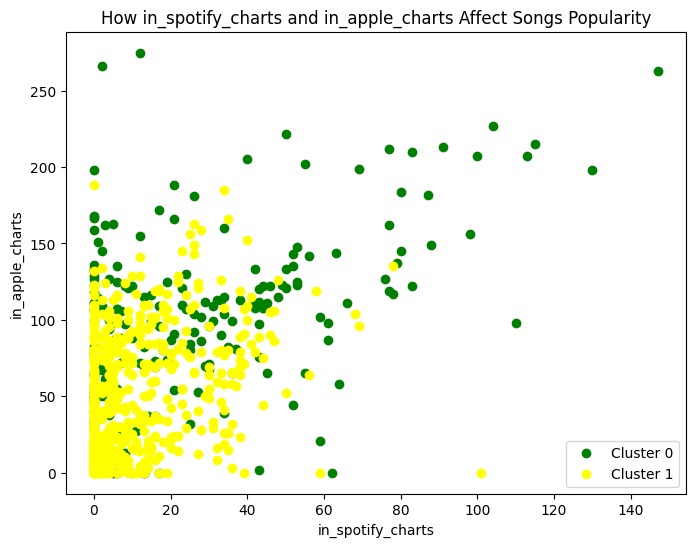

In [ ]:
clustering(data, 'in_spotify_charts','in_apple_charts')

In [ ]:
select_cols = ['artist(s)_name','track_name','streams', 'cluster']
clustergroup = data[select_cols].sort_values(by='streams',ascending=False).head(10)
clustergroup[clustergroup['cluster']==0]

,artist(s)_name,track_name,streams,cluster
55,The Weeknd,Blinding Lights,3703895074,0
179,Ed Sheeran,Shape of You,3562543890,0
86,Lewis Capaldi,Someone You Loved,2887241814,0
620,Tones and I,Dance Monkey,2864791672,0
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550,0
162,"Drake, WizKid, Kyla",One Dance,2713922350,0
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665343922,0
140,Imagine Dragons,Believer,2594040133,0
725,"The Chainsmokers, Halsey",Closer,2591224264,0
48,"The Weeknd, Daft Punk",Starboy,2565529693,0


In [ ]:
clustergroup = data[select_cols]
clustergroup[clustergroup['cluster']==1].sort_values(by='streams', ascending=False).head(10)

,artist(s)_name,track_name,streams,cluster
169,Bruno Mars,When I Was Your Man,1661187319,1
154,Bruno Mars,Locked Out Of Heaven,1481349984,1
170,Alec Benjamin,Let Me Down Slowly,1374581173,1
320,"Coolio, L.V.",Gangsta's Paradise,1357608774,1
401,Conan Gray,Heather,1301799902,1
820,The Goo Goo Dolls,Iris,1284942608,1
565,Olivia Rodrigo,deja vu,1256880657,1
599,Ariana Grande,positions,1252563873,1
533,"Juan Cruz Toledo, Huilen Toledo",traitor,1230855859,1
619,"Imagine Dragons, League of Legends, Arcane",Enemy - from the series Arcane League of Legends,1223481149,1


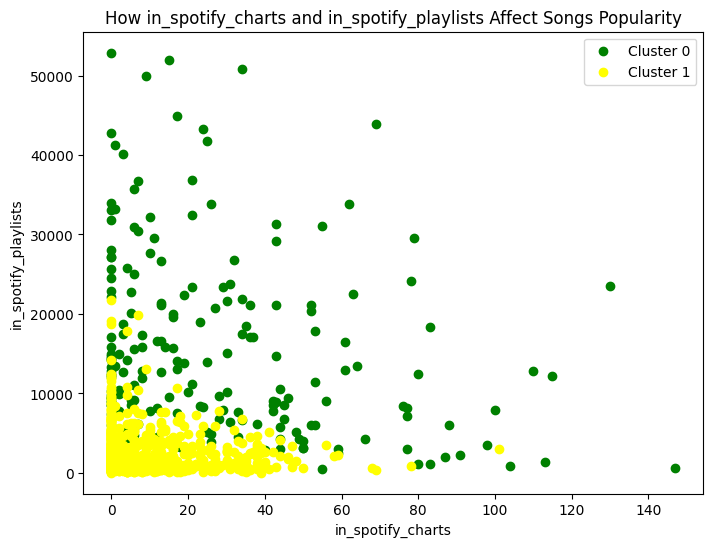

In [ ]:
clustering(data, 'in_spotify_charts','in_spotify_playlists')

In [ ]:
select_cols = ['artist(s)_name','track_name','streams', 'in_spotify_charts', 'in_spotify_playlists','cluster']
clustergroup = data[select_cols]
clustergroup = clustergroup[clustergroup['in_spotify_charts']!=0]
clustergroup[clustergroup['cluster']==0].sort_values(by='in_spotify_charts',ascending=True).head(10)

,artist(s)_name,track_name,streams,in_spotify_charts,in_spotify_playlists,cluster
672,Kendrick Lamar,HUMBLE.,1929770265,1,33206,0
871,Guns N' Roses,Sweet Child O' Mine,1553497987,1,41231,0
695,Harry Styles,Adore You,1439191367,1,13454,0
888,Ghost,Mary On A Cross,387080183,2,2668,0
568,"The Weeknd, Gesaffelstein",Lost in the Fire,686734357,2,7731,0
432,SZA,Good Days,826623384,2,10426,0
641,Maroon 5,Memories,1759567999,2,9974,0
693,"Shawn Mendes, Camila Cabello",Seï¿½ï¿½o,2484812918,2,15010,0
400,Sam Smith,I'm Not The Only One,1606986953,3,17492,0
535,Olivia Rodrigo,drivers license,1858144199,3,12685,0


In [ ]:
clustergroup[clustergroup['cluster']==1].sort_values(by='in_spotify_charts',ascending=True).head(10)

,artist(s)_name,track_name,streams,in_spotify_charts,in_spotify_playlists,cluster
732,"Daddy Yankee, Bad Bunny",X ï¿½ï¿½LTIMA,349746291,1,2697,1
536,"Xamï¿½ï¿½, Gustah, Neo B",Malvadï¿½ï¿,240684449,1,648,1
846,Harry Styles,Keep Driving,236060709,1,2094,1
583,IVE,ELEVEN,247737946,1,521,1
828,Harry Styles,Music For a Sushi Restaurant,334733572,1,4449,1
822,Kevin Kaarl,San Lucas,244891912,1,407,1
667,"Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...","Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...",245400167,1,1034,1
228,"James Blake, Metro Boomin",Hummingbird (Metro Boomin & James Blake),39666245,1,277,1
851,Harry Styles,Daydreaming,187703102,1,1900,1
254,"Mambo Kingz, DJ Luian, Anuel Aa",Mejor Que Yo,50847624,1,675,1


### Clustering with T-SNE

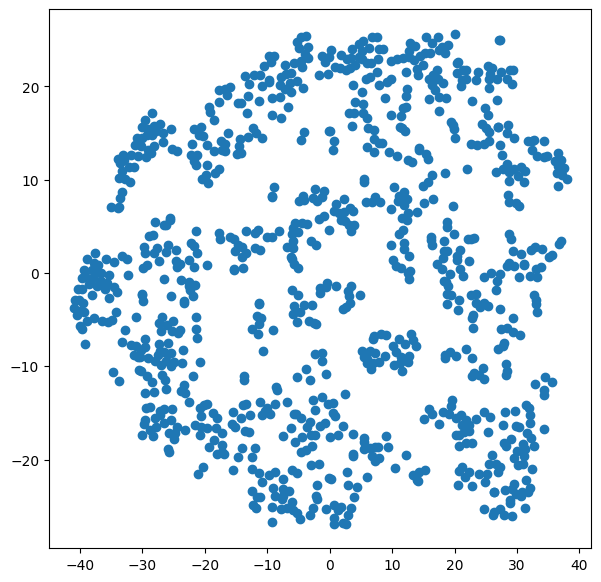

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_scaled)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [ ]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(data_scaled)
    error.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

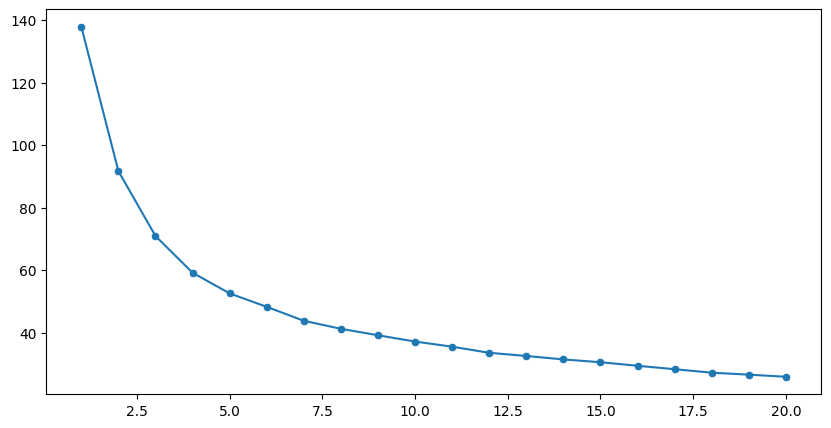

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()

In [ ]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



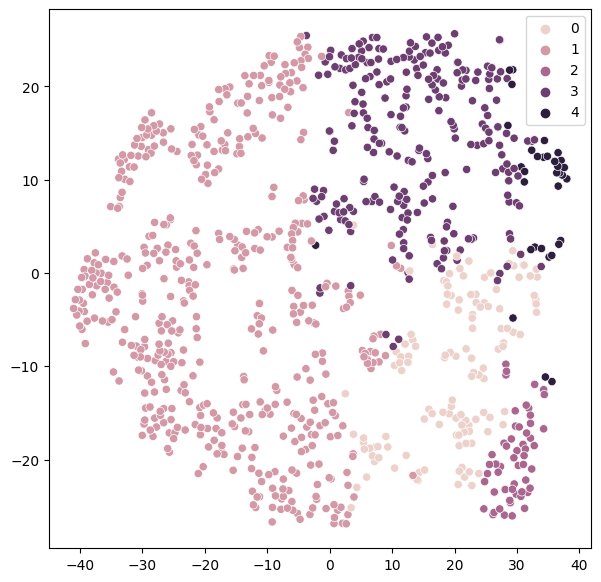

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

In [ ]:
pd.DataFrame(segments)

,0
0,4
1,4
2,4
3,4
4,4
...,...
947,1
948,1
949,1
950,1


In [ ]:
data['cluster_tsne'] = segments

In [ ]:
data.groupby('cluster_tsne')[features].mean()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
cluster_tsne,,,,,,,,
0,11913.071429,13.984127,1.190354e+09,154.587302,71.436508,666.023810,4.404762,46.007937
1,2075.715726,3.750000,2.642048e+08,30.342742,14.639113,58.364919,0.830645,16.582661
2,29923.581818,21.690909,1.976404e+09,269.709091,93.363636,4091.309091,4.381818,70.454545
3,2440.714876,16.698347,3.339324e+08,45.652893,94.979339,78.615702,2.888430,68.780992
4,5630.000000,78.454545,5.731744e+08,127.242424,154.151515,306.515152,19.212121,594.969697


In [ ]:
select_cols = ['artist(s)_name','track_name','streams', 'cluster_tsne']
clustergroup = data[select_cols]
clustergroup[clustergroup['cluster_tsne']==4].sort_values(by='streams', ascending=False).head(10)

,artist(s)_name,track_name,streams,cluster_tsne
14,Harry Styles,As It Was,2513188493,4
106,"Dua Lipa, Elton John, Pnau",Cold Heart - PNAU Remix,1605224506,4
12,Miley Cyrus,Flowers,1316855716,4
22,Arctic Monkeys,I Wanna Be Yours,1297026226,4
15,SZA,Kill Bill,1163093654,4
42,"Bebe Rexha, David Guetta",I'm Good (Blue),1109433169,4
46,OneRepublic,I Ain't Worried,1085685420,4
33,Taylor Swift,Anti-Hero,999748277,4
26,"Rï¿½ï¿½ma, Selena G",Calm Down (with Selena Gomez),899183384,4
32,"The Weeknd, 21 Savage, Metro Boomin",Creepin',843957510,4
